In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install autocorrect
!pip install konlpy
!pip install gensim
!pip install wordcloud
!pip install sklearn
!pip install sklearn.feature_extraction

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

ERROR: Could not find a version that satisfies the requirement sklearn.feature_extraction (from versions: none)
ERROR: No matching distribution found for sklearn.feature_extraction
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import word_tokenize
from autocorrect import spell
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from gensim import corpora 
from gensim import models
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
path = '/content/gdrive/MyDrive/데마팀플/data/'

score = ['eastar_en.csv', 'jeju_en.csv', 'jin_en.csv', 'tway_en.csv']

reviews = pd.DataFrame(columns=score)

for i in range(len(score)):
    data = pd.read_csv(path+score[i])
    reviews.iloc[:,i] = data.iloc[:, 1]

reviews

,eastar_en.csv,jeju_en.csv,jin_en.csv,tway_en.csv
0,"I have travelled with this airline before, but...",They only catered korean passengers and ingnor...,We flew Jin Air in 2017 from Seoul to Osaka an...,I need to change my name but after calling the...
1,EASTAR Cancels flight but customers cannot get...,They didn't let me check in on Friday and turn...,"Jin Air is a low-cost carrier, so I didn't exp...",T’way has very racist staff! It has happened t...
2,DO NOT BOOK IF YOU ARE A FOREIGNER. The compan...,Wouldn't let me on the plane and refused to is...,I want to open a complaint following what happ...,I was in the unfortunate position of having to...
3,Im honestly not one to write a review but im s...,"Flight seats were horribly uncomfortable, the ...","reasonable low cost Airlines,Friendly Crew but...",The low weight requirements doesn't make sense...
4,Easy net for me since their start is the defin...,Do not fly this airlines unless you from korea...,Crew were extremely kind and attentive through...,I took the flight from Fukuoka to Daegu on 18 ...
5,"Hello all,\n\nI'm a resident in Portugal and I...","Don't trust, no service, don't operate like we...",JinAir is the best! We got very affordable tic...,T'way Air suddenly cancelled all flights from ...
6,Great experience with Eastar Jet. The checkin ...,"Took off from Osaka approx 20 minutes late, we...",We had an amazing experience with Jin-Air boun...,Worst customer service people. Doesn’t have em...
7,We wore flying close to 6h from Seoul to Bangk...,Horrible air line!\n\nMy wife and I were extre...,"Check in and boarding was good, staff were ver...",We arrived 2:30 mins before our flight time an...
8,I’m 6”4 and found this plane to have enough ro...,"Low costs , just like taking a bus, sleep thru...",Hi use this for return flight for Shanghai-Jej...,Self automated machine to help ease in check i...
9,value for money for a low cost airlines. I don...,One of the great things about Jeju Air is that...,We were surprised to receive free food and wat...,"To be sure, I haven’t flown with every airline..."


In [5]:
# 맞춤법 교정
for i in range(len(data)):
    spell(data.iloc[i,1])
    print(i)

autocorrect.spell is deprecated,             use autocorrect.Speller instead
0
autocorrect.spell is deprecated,             use autocorrect.Speller instead
1
autocorrect.spell is deprecated,             use autocorrect.Speller instead
2
autocorrect.spell is deprecated,             use autocorrect.Speller instead
3
autocorrect.spell is deprecated,             use autocorrect.Speller instead
4
autocorrect.spell is deprecated,             use autocorrect.Speller instead
5
autocorrect.spell is deprecated,             use autocorrect.Speller instead
6
autocorrect.spell is deprecated,             use autocorrect.Speller instead
7
autocorrect.spell is deprecated,             use autocorrect.Speller instead
8
autocorrect.spell is deprecated,             use autocorrect.Speller instead
9
autocorrect.spell is deprecated,             use autocorrect.Speller instead
10
autocorrect.spell is deprecated,             use autocorrect.Speller instead
11
autocorrect.spell is deprecated,             use a

In [6]:
tokens = []

for i in range(len(data)):
    tokens.append(word_tokenize(data.iloc[i,1]))
    print(i)

tokens

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


[['I',
  'need',
  'to',
  'change',
  'my',
  'name',
  'but',
  'after',
  'calling',
  'them',
  'many',
  'times',
  ',',
  'they',
  'said',
  'can',
  'not',
  'change',
  'name',
  '.',
  'They',
  'told',
  'me',
  'to',
  'cancel',
  'but',
  'actually',
  'cancel',
  'instruction',
  'is',
  'not',
  'provided',
  'and',
  'finally',
  'I',
  'can',
  'not',
  'cancel',
  'my',
  'ticket',
  'to',
  'revoke',
  'my',
  'money',
  '.',
  'The',
  'worst',
  'service',
  'and',
  'booking',
  'system',
  'I',
  'have',
  'ever',
  'seen',
  '.',
  'Tway',
  'should',
  'be',
  'stopped',
  'from',
  'doing',
  'bussiness',
  '.',
  'Terrible',
  'inpression',
  '.',
  'Everyone',
  'should',
  'never',
  'touch',
  'Tway',
  'if',
  'you',
  'do',
  "n't",
  'want',
  'to',
  'be',
  'regretted',
  'and',
  'disappointed',
  ',',
  'angried',
  ',',
  'tired',
  'of',
  'a',
  'Korean',
  'airline'],
 ['T',
  '’',
  'way',
  'has',
  'very',
  'racist',
  'staff',
  '!',
  'It'

In [7]:
for i in range(len(tokens)):
  tokens[i] = nltk.pos_tag(tokens[i])
tokens

[[('I', 'PRP'),
  ('need', 'VBP'),
  ('to', 'TO'),
  ('change', 'VB'),
  ('my', 'PRP$'),
  ('name', 'NN'),
  ('but', 'CC'),
  ('after', 'IN'),
  ('calling', 'VBG'),
  ('them', 'PRP'),
  ('many', 'JJ'),
  ('times', 'NNS'),
  (',', ','),
  ('they', 'PRP'),
  ('said', 'VBD'),
  ('can', 'MD'),
  ('not', 'RB'),
  ('change', 'VB'),
  ('name', 'NN'),
  ('.', '.'),
  ('They', 'PRP'),
  ('told', 'VBD'),
  ('me', 'PRP'),
  ('to', 'TO'),
  ('cancel', 'VB'),
  ('but', 'CC'),
  ('actually', 'RB'),
  ('cancel', 'JJ'),
  ('instruction', 'NN'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('provided', 'VBN'),
  ('and', 'CC'),
  ('finally', 'RB'),
  ('I', 'PRP'),
  ('can', 'MD'),
  ('not', 'RB'),
  ('cancel', 'VB'),
  ('my', 'PRP$'),
  ('ticket', 'NN'),
  ('to', 'TO'),
  ('revoke', 'VB'),
  ('my', 'PRP$'),
  ('money', 'NN'),
  ('.', '.'),
  ('The', 'DT'),
  ('worst', 'JJS'),
  ('service', 'NN'),
  ('and', 'CC'),
  ('booking', 'VBG'),
  ('system', 'NN'),
  ('I', 'PRP'),
  ('have', 'VBP'),
  ('ever', 'RB'),
  ('s

In [8]:
tokens[20]

[('Excellent', 'JJ'),
 ('Service', 'NNP'),
 ('from', 'IN'),
 ('a', 'DT'),
 ('discount', 'NN'),
 ('Carrier', 'NNP'),
 ('-', ':'),
 ('friendly', 'JJ'),
 ('flight', 'NN'),
 ('attendants', 'NNS'),
 ('and', 'CC'),
 ('Airport', 'NNP'),
 ('agents', 'NNS'),
 (',', ','),
 ('even', 'RB'),
 ('though', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('language', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('English', 'JJ'),
 ('very', 'RB'),
 ('clear', 'JJ'),
 ('communication', 'NN'),
 ('.', '.')]

In [9]:
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
nouns = []

for i in range(len(tokens)):
    li = []
    for j in range(len(tokens[i])):
        if tokens[i][j][1][0] == 'N':
            li.append(tokens[i][j][0])
            print('li append', tokens[i][j], i, j)
    nouns.append(li)
    print(i,'complete')

    

li append ('name', 'NN') 0 5
li append ('times', 'NNS') 0 11
li append ('name', 'NN') 0 18
li append ('instruction', 'NN') 0 28
li append ('ticket', 'NN') 0 39
li append ('money', 'NN') 0 43
li append ('service', 'NN') 0 47
li append ('system', 'NN') 0 50
li append ('Tway', 'NNP') 0 56
li append ('bussiness', 'NN') 0 62
li append ('inpression', 'NN') 0 65
li append ('Everyone', 'NN') 0 67
li append ('Tway', 'NNP') 0 71
li append ('airline', 'NN') 0 89
0 complete
li append ('T', 'NNP') 1 0
li append ('’', 'NNP') 1 1
li append ('way', 'NN') 1 2
li append ('staff', 'NN') 1 6
li append ('airports', 'NNS') 1 14
li append ('t', 'NN') 1 19
li append ('greet', 'NN') 1 20
li append ('minutes', 'NNS') 1 33
li append ('baggage', 'NN') 1 40
li append ('foreigners', 'NNS') 1 44
li append ('t', 'NN') 1 47
li append ('flight', 'NN') 1 54
li append ('passengers', 'NNS') 1 63
li append ('conversation', 'NN') 1 66
li append ('staff', 'NN') 1 69
li append ('Korean', 'NNP') 1 71
li append ('clerk', 'NN') 

In [11]:
nouns

[['name',
  'times',
  'name',
  'instruction',
  'ticket',
  'money',
  'service',
  'system',
  'Tway',
  'bussiness',
  'inpression',
  'Everyone',
  'Tway',
  'airline'],
 ['T',
  '’',
  'way',
  'staff',
  'airports',
  't',
  'greet',
  'minutes',
  'baggage',
  'foreigners',
  't',
  'flight',
  'passengers',
  'conversation',
  'staff',
  'Korean',
  'clerk',
  'baggage',
  'form',
  'ten',
  'minutes',
  'passenger',
  'bags',
  '’',
  'people',
  'others',
  'skin',
  'color',
  'something',
  'neither',
  'say',
  'staff',
  'Jeju',
  'airport',
  'friend',
  'line',
  'minutes',
  'passengers',
  'front',
  'everybody',
  'time',
  'friend',
  'guy',
  'work',
  'station',
  '’',
  'anything',
  'airlines',
  'number',
  'case',
  '“',
  'something',
  '”',
  'bag',
  'T',
  '’',
  'way',
  'acts',
  'security',
  'ARC',
  'masks',
  'disgusting',
  'travelers',
  'use',
  'airline',
  't',
  'respect'],
 ['position',
  'flight',
  'Daegu',
  'Jeju',
  'result',
  'flights'

In [12]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
lemmatized_words = []

for i in range(len(tokens)):
    for word, pos in tokens[i]:
        lemmatized_words.append(lemma.lemmatize(word, get_wordnet_pos(pos)))

lemmatized_words


['I',
 'need',
 'to',
 'change',
 'my',
 'name',
 'but',
 'after',
 'call',
 'them',
 'many',
 'time',
 ',',
 'they',
 'say',
 'can',
 'not',
 'change',
 'name',
 '.',
 'They',
 'tell',
 'me',
 'to',
 'cancel',
 'but',
 'actually',
 'cancel',
 'instruction',
 'be',
 'not',
 'provide',
 'and',
 'finally',
 'I',
 'can',
 'not',
 'cancel',
 'my',
 'ticket',
 'to',
 'revoke',
 'my',
 'money',
 '.',
 'The',
 'bad',
 'service',
 'and',
 'book',
 'system',
 'I',
 'have',
 'ever',
 'see',
 '.',
 'Tway',
 'should',
 'be',
 'stop',
 'from',
 'do',
 'bussiness',
 '.',
 'Terrible',
 'inpression',
 '.',
 'Everyone',
 'should',
 'never',
 'touch',
 'Tway',
 'if',
 'you',
 'do',
 "n't",
 'want',
 'to',
 'be',
 'regret',
 'and',
 'disappoint',
 ',',
 'angried',
 ',',
 'tire',
 'of',
 'a',
 'Korean',
 'airline',
 'T',
 '’',
 'way',
 'have',
 'very',
 'racist',
 'staff',
 '!',
 'It',
 'have',
 'happen',
 'twice',
 'at',
 'different',
 'airport',
 '.',
 'They',
 'don',
 '’',
 't',
 'greet',
 'u',
 'becau

In [13]:
words_no_stopwords = []
words_no_stopwords.append([lemmatized_words for lemmatized_words in nouns if word not in stop_words])
words_no_stopwords

[[['name',
   'times',
   'name',
   'instruction',
   'ticket',
   'money',
   'service',
   'system',
   'Tway',
   'bussiness',
   'inpression',
   'Everyone',
   'Tway',
   'airline'],
  ['T',
   '’',
   'way',
   'staff',
   'airports',
   't',
   'greet',
   'minutes',
   'baggage',
   'foreigners',
   't',
   'flight',
   'passengers',
   'conversation',
   'staff',
   'Korean',
   'clerk',
   'baggage',
   'form',
   'ten',
   'minutes',
   'passenger',
   'bags',
   '’',
   'people',
   'others',
   'skin',
   'color',
   'something',
   'neither',
   'say',
   'staff',
   'Jeju',
   'airport',
   'friend',
   'line',
   'minutes',
   'passengers',
   'front',
   'everybody',
   'time',
   'friend',
   'guy',
   'work',
   'station',
   '’',
   'anything',
   'airlines',
   'number',
   'case',
   '“',
   'something',
   '”',
   'bag',
   'T',
   '’',
   'way',
   'acts',
   'security',
   'ARC',
   'masks',
   'disgusting',
   'travelers',
   'use',
   'airline',
   't',
   '

In [14]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# 워드클라우드

In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


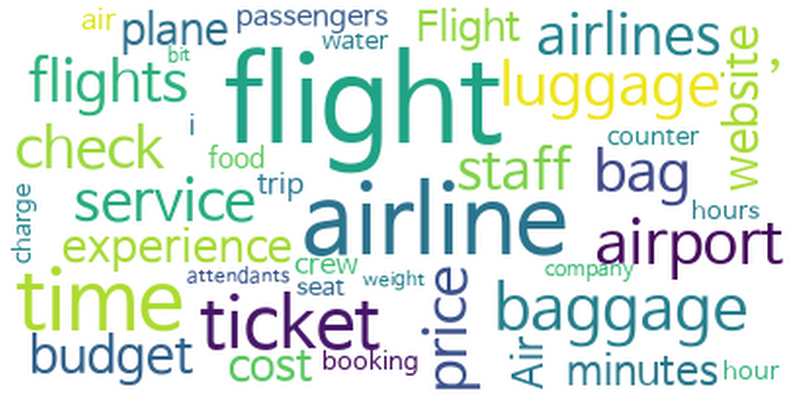

In [16]:

noun_adj_list = []
remove_list = ['Seoul', 'Daegu', 'Jeju', 'Tokyo', 'way', 'T\'way', '\'', 'T', 't', ',']

# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word_list in words_no_stopwords:
  for word in word_list :
    for wd in word:
      if wd in remove_list :
        continue
      else :
        noun_adj_list.append(wd)
'''
for word in remove_list : 
  noun_adj_list = noun_adj_list.remove(i)
'''
# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40)

# WordCloud 생성
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(14,10))
plt.imshow(cloud,interpolation='lanczos')
plt.axis('off')
plt.show()

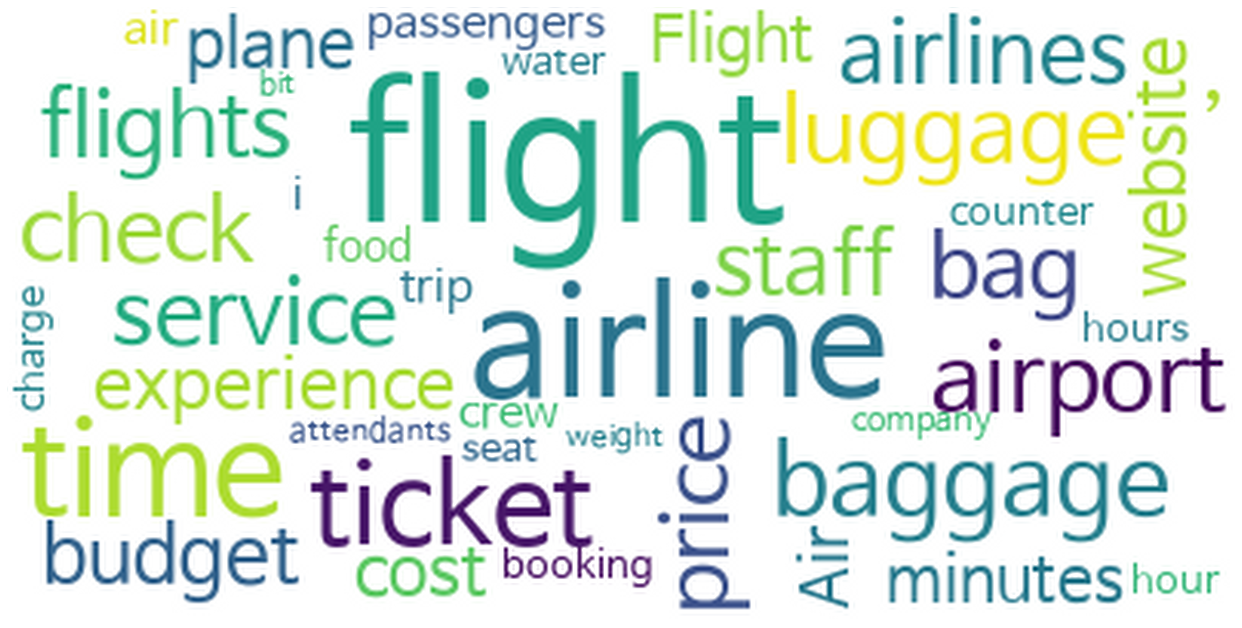

In [17]:
plt.figure(figsize=(22,22))
plt.imshow(cloud,interpolation='lanczos')
plt.axis('off')
plt.show()